<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/IVF_Success_Rate_Predict/blob/main/IVF_DL_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IVF(pregancy success rate prediction using preception , Ann and randomForest ) still randomforest wins

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from mlxtend.plotting import plot_decision_regions

In [30]:
df = pd.read_csv('/content/new27file_file.csv')

In [31]:
df

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3.5,3,1,1,2,1,5,2,3,2,1
1,42,1,3.5,3,1,1,1,2,3,2,3,2,3
2,29,2,3.5,2,1,1,1,2,8,7,8,2,1
3,23,1,3.0,3,1,1,1,2,15,9,9,2,1
4,22,1,5.0,3,1,1,1,1,5,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,35,2,13.0,3,1,1,1,1,18,17,18,2,3
220,28,2,9.0,2,1,1,1,2,8,7,7,2,3
221,41,2,12.0,3,2,2,1,2,8,7,7,2,3
222,34,1,9.0,3,1,1,1,2,8,7,7,2,3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      224 non-null    int64  
 1   v2      224 non-null    int64  
 2   v3      224 non-null    float64
 3   v4      224 non-null    int64  
 4   v5      224 non-null    int64  
 5   v6      224 non-null    int64  
 6   v7      224 non-null    int64  
 7   v8      224 non-null    int64  
 8   v9      224 non-null    int64  
 9   v10     224 non-null    int64  
 10  v11     224 non-null    int64  
 11  v12     224 non-null    int64  
 12  v13     224 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 22.9 KB


In [33]:
# Drop rows where v13 is equal to 2
df = df[df['v13'] != 2]

df

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
0,32,2,3.5,3,1,1,2,1,5,2,3,2,1
1,42,1,3.5,3,1,1,1,2,3,2,3,2,3
2,29,2,3.5,2,1,1,1,2,8,7,8,2,1
3,23,1,3.0,3,1,1,1,2,15,9,9,2,1
4,22,1,5.0,3,1,1,1,1,5,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,35,2,13.0,3,1,1,1,1,18,17,18,2,3
220,28,2,9.0,2,1,1,1,2,8,7,7,2,3
221,41,2,12.0,3,2,2,1,2,8,7,7,2,3
222,34,1,9.0,3,1,1,1,2,8,7,7,2,3


v1


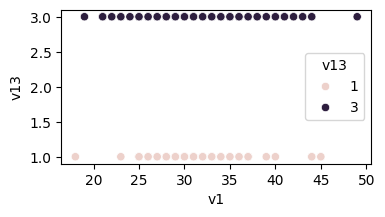

v2


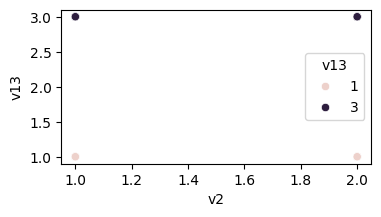

v3


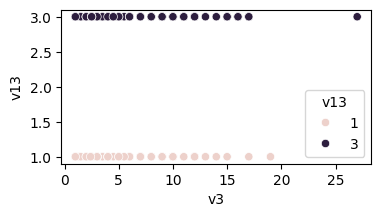

v4


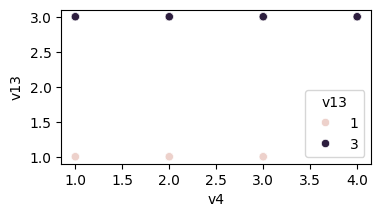

v5


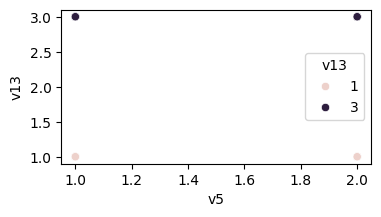

v6


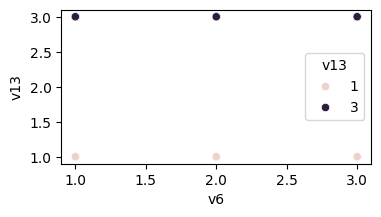

v7


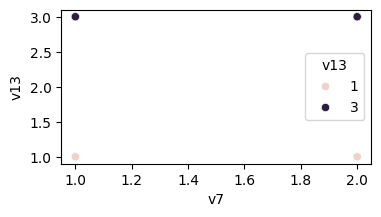

v8


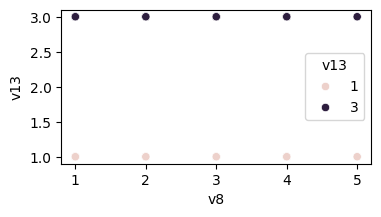

v9


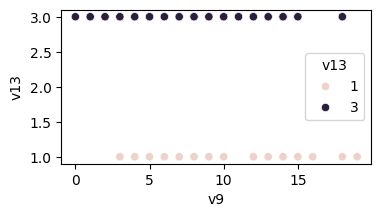

v10


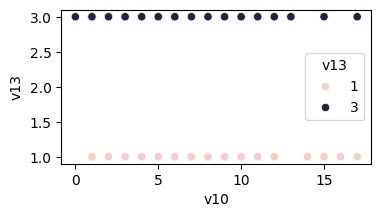

v11


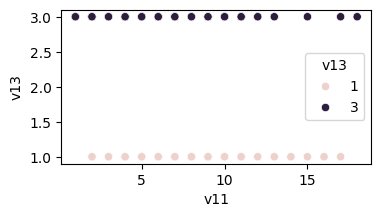

v12


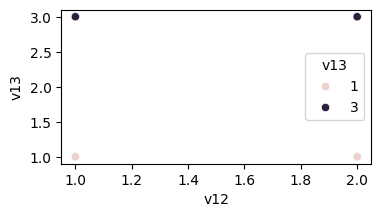

In [34]:
a = df.columns
for i in a[:-1]:
  plt.figure(figsize=(4,2))
  print(i)
  sns.scatterplot(x=df[i], y = df['v13'], hue = df['v13'])
  plt.show()


In [35]:
df = df[['v1', 'v3', 'v9', 'v11', 'v13']]
df

,v1,v3,v9,v11,v13
0,32,3.5,5,3,1
1,42,3.5,3,3,3
2,29,3.5,8,8,1
3,23,3.0,15,9,1
4,22,5.0,5,3,3
...,...,...,...,...,...
219,35,13.0,18,18,3
220,28,9.0,8,7,3
221,41,12.0,8,7,3
222,34,9.0,8,7,3


In [36]:
df['v13'] = df['v13'].replace({1: 1, 3: 0})
df

,v1,v3,v9,v11,v13
0,32,3.5,5,3,1
1,42,3.5,3,3,0
2,29,3.5,8,8,1
3,23,3.0,15,9,1
4,22,5.0,5,3,0
...,...,...,...,...,...
219,35,13.0,18,18,0
220,28,9.0,8,7,0
221,41,12.0,8,7,0
222,34,9.0,8,7,0


In [37]:
X = df.iloc[:,:-1]
X

,v1,v3,v9,v11
0,32,3.5,5,3
1,42,3.5,3,3
2,29,3.5,8,8
3,23,3.0,15,9
4,22,5.0,5,3
...,...,...,...,...
219,35,13.0,18,18
220,28,9.0,8,7
221,41,12.0,8,7
222,34,9.0,8,7


In [38]:
y = df.iloc[:,-1]
y

,v13
0,1
1,0
2,1
3,1
4,0
...,...
219,0
220,0
221,0
222,0


In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, y =ros.fit_resample(X,y)

In [40]:
X.shape, y.shape

((294, 4), (294,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 4), (59, 4), (235,), (59,))

In [44]:
from sklearn.linear_model import Perceptron

In [45]:
pr = Perceptron()
pr.fit(X_train, y_train)

Perceptron()

In [46]:
pr.score(X_test, y_test)*100 , pr.score(X_train, y_train)*100

(47.45762711864407, 60.0)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4804 - loss: 0.7081
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5693 - loss: 0.6815
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6011 - loss: 0.6668
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6488 - loss: 0.6349
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6472 - loss: 0.6379
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5968 - loss: 0.6591
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5795 - loss: 0.6526
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5921 - loss: 0.6583
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6328 - loss: 0.6112
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6192 - loss: 0.6276


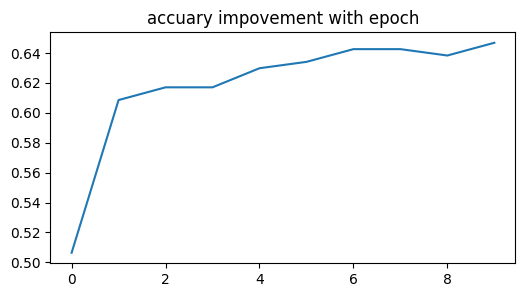

Test Accuracy: 59.32%
Train Accuracy: 65.11%


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the Sequential model
model = Sequential()
# Add a Dense layer with 10 units and 'relu' activation function
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu')) # Second hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=6, verbose=1)

pd.DataFrame(history.history)['accuracy'].plot(figsize=(6,3))
plt.title("accuary impovement with epoch")
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Optionally, evaluate on training data as well
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {train_accuracy*100:.2f}%')

In [51]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5726 - loss: 0.7061


[0.7114959359169006, 0.5932203531265259]

In [58]:
# prompt: createa a model using RandomforestClassifer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=20, random_state=10) # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Test Accuracy: {accuracy_rf*100:.2f}%')

# Evaluate on training data as well
y_train_pred_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Random Forest Classifier Train Accuracy: {train_accuracy_rf*100:.2f}%')


Random Forest Classifier Test Accuracy: 84.75%
Random Forest Classifier Train Accuracy: 97.87%
